# 0. Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import random
import numpy as np
import torch

# Set the seed value (e.g., 42)
seed_value = 64

# Seed the random number generators
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed(seed_value)  # If using CUDA
torch.cuda.manual_seed_all(seed_value)  # If using multiple GPUs

# 1. Labels

In [ ]:
# # Example label mappings
pos_label2id = {
    'CC' : 0,  # Coordinating conjunction
    'CD' : 1,  # Cardinal number
    'OD' : 2,  # Ordinal Number
    'DT' : 3,  # Determiner
    'FW' : 4,  # Foreign word
    'IN' : 5,  # Preposition
    'JJ' : 6, # Adjective
    'MD' : 7, # Modal
    'NEG' : 8, # Negation
    'NN' : 9, # Noun
    'NNP' : 10, # Proper Noun
    'NND' : 11, # Classifier
    'PR' : 12, # Demonstrative Pronoun
    'PRP' : 13, # Personal Pronoun
    'RB' : 14, # Adverb
    'RP' : 15, # Particle
    'SC' : 16, # Subordinating Conjunction
    'SYM' : 17, # Symbol
    'UH' : 18, # Interjection
    'VB' : 19, # Verb
    'WH': 20, # Question
    'Z' : 21 # Punctuation
}

ner_label2id = {
    'O': 0,      # Outside (non-entity)
    'B-LOC': 1,  # Beginning of a location entity
    'I-LOC': 2,  # Inside a location entity
    'B-PERSON': 3,  # Beginning of a person entity
    'I-PERSON': 4,  # Inside a person entity
    'B-ORG': 5,  # Beginning of an organization entity
    'I-ORG': 6,  # Inside an organization entity
    'B-EVENT': 7, # Beginning of a miscellaneous entity
    'I-EVENT': 8,  # Inside a miscellaneous
    'B-GPE': 9,  # Beginning of a geopolitical entity
    'I-GPE': 10  # Inside a geopolitical entity
}

In [ ]:
# # # Example label mappings
# pos_label2id = {
#     'CC' : 0,  # Coordinating conjunction
#     'CD' : 1,  # Cardinal number
#     'OD' : 2,  # Ordinal Number
#     'DT' : 3,  # Determiner
#     'FW' : 4,  # Foreign word
#     'IN' : 5,  # Preposition
#     'JJ' : 6, # Adjective
#     'MD' : 7, # Modal
#     'NEG' : 8, # Negation
#     'NN' : 9, # Noun
#     'NNP' : 10, # Proper Noun
#     'NND' : 11, # Classifier
#     'PR' : 12, # Demonstrative Pronoun
#     'PRP' : 13, # Personal Pronoun
#     'RB' : 14, # Adverb
#     'RP' : 15, # Particle
#     'SC' : 16, # Subordinating Conjunction
#     'SYM' : 17, # Symbol
#     'UH' : 18, # Interjection
#     'VB' : 19, # Verb
#     'WH': 20, # Question
#     'X' : 21, # Unknown
#     'Z' : 22 # Punctuation
# }

# ner_label2id = {
#     'O': 0,      # Outside (non-entity)
#     'B-LOC': 1,  # Beginning of a location entity
#     'I-LOC': 2,  # Inside a location entity
#     'B-PERSON': 3,  # Beginning of a person entity
#     'I-PERSON': 4,  # Inside a person entity
#     'B-ORG': 5,  # Beginning of an organization entity
#     'I-ORG': 6,  # Inside an organization entity
#     'B-EVENT': 7, # Beginning of a miscellaneous entity
#     'I-EVENT': 8,  # Inside a miscellaneous
#     'B-MISC': 9,  # Beginning of a miscellaneous entity
#     'I-MISC': 10,  # Inside a miscellaneous
#     'B-GPE': 11,  # Beginning of a geopolitical entity
#     'I-GPE': 12  # Inside a geopolitical entity
# }


In [ ]:
pos_id2label = {v: k for k, v in pos_label2id.items()}
ner_id2label = {v: k for k, v in ner_label2id.items()}

# 2. Data

In [ ]:
full_dataset = pd.read_csv('/content/FinalDataset - Fix - Rechecked LOC n GPE - NoMISC - Sheet1.csv')

full_dataset = full_dataset[:1026]

import ast

for col in full_dataset.columns:
    full_dataset[col] = full_dataset[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
for index, row in full_dataset.iterrows():
  if len(row['tokens']) != len(row['pos_labels']) or len(row['tokens']) != len(row['ner_labels']):
    print(index, len(row['tokens']), len(row['ner_labels']), len(row['pos_labels']), sep='\t')


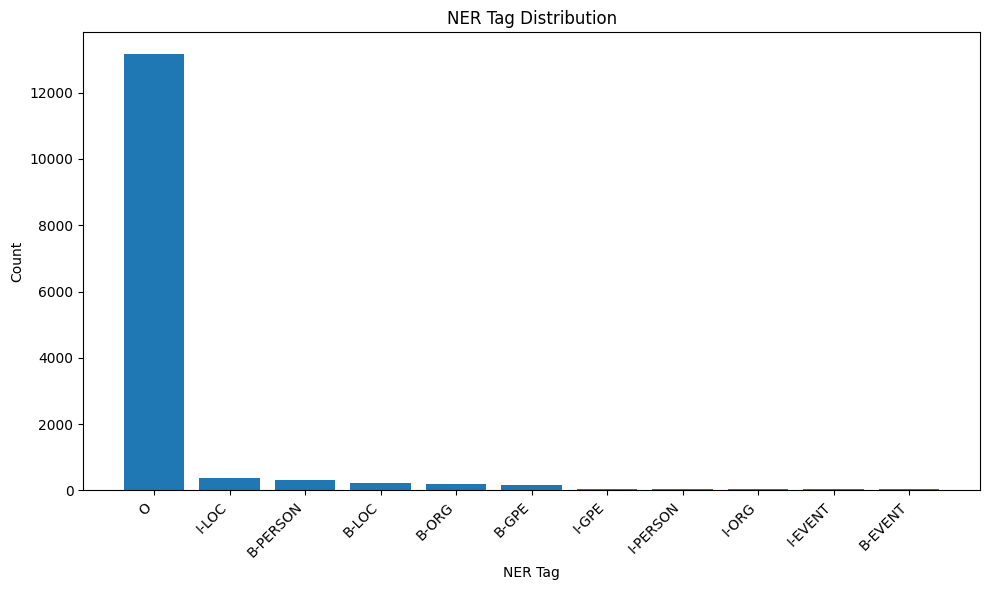

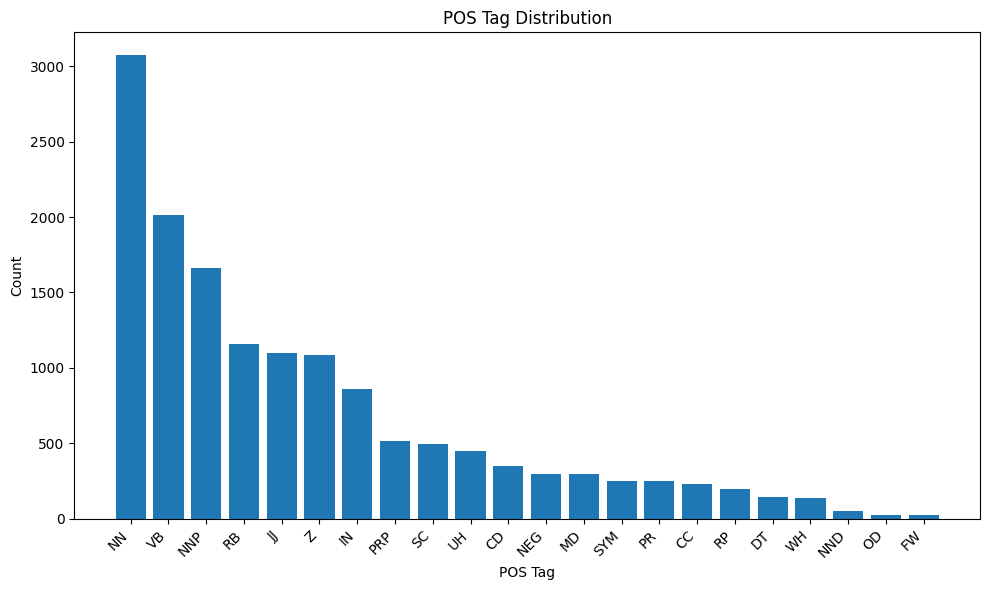

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

all_ner_tags = [tag for sent in full_dataset['ner_labels'] for tag in sent]
ner_counts = Counter(all_ner_tags)

labels, counts = zip(*sorted(ner_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha='right')
plt.title("NER Tag Distribution")
plt.xlabel("NER Tag")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

all_pos_tags = [tag[0] if isinstance(tag, list) else tag for sent in full_dataset['pos_labels'] for tag in sent]
pos_counts = Counter(all_pos_tags)

labels_pos, counts_pos = zip(*sorted(pos_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(labels_pos, counts_pos)
plt.xticks(rotation=45, ha='right')
plt.title("POS Tag Distribution")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(full_dataset, test_size=0.1, random_state=seed_value)

In [ ]:
print(len(train_set))
print(len(val_set))

923
103


In [ ]:
print(train_set.iloc[0])

tokens        [cara, ke, blok, m, pake, transum, dari, bunda...
ner_labels    [O, O, B-LOC, I-LOC, O, O, O, B-LOC, I-LOC, O,...
pos_labels    [NN, IN, NNP, NNP, VB, NN, IN, NNP, NNP, OD, Z...
Name: 1016, dtype: object


# 4. Non CRF Setup


## 4.0. Tokenizer and Encoding

In [ ]:
from transformers import XLMRobertaTokenizerFast

# Load the tokenizer
tokenizer = XLMRobertaTokenizerFast.from_pretrained('xlm-roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

In [ ]:
def align_labels(encoding, pos_labels, ner_labels, pos_label2id, ner_label2id):
    all_pos, all_ner = [], []
    for idx, word_ids in enumerate(encoding.word_ids(batch_index=i) for i in range(len(encoding['input_ids']))):
        pos_seq, ner_seq = [], []
        words_pos = pos_labels[idx] if idx < len(pos_labels) else []
        words_ner = ner_labels[idx] if idx < len(ner_labels) else []
        w_idx = 0

        for token_idx, word_id in enumerate(word_ids):
            if word_id is None:
                pos_seq.append(-100)
                ner_seq.append(-100)

            elif word_id != word_ids[token_idx-1] if token_idx>0 else True:
                # first subword
                if w_idx < len(words_pos):
                  try:
                      pos_tag = words_pos[w_idx]
                      if isinstance(pos_tag, list):
                          pos_tag = pos_tag[0] if pos_tag else None

                      # akses langsung—KeyError jika pos_tag tidak ada di pos_label2id
                      pos_seq.append(pos_label2id[pos_tag])

                      if w_idx < len(words_ner):
                          ner_tag = words_ner[w_idx]
                          if isinstance(ner_tag, list):
                              ner_tag = ner_tag[0] if ner_tag else None

                          # akses langsung—KeyError jika ner_tag tidak ada di ner_label2id
                          ner_seq.append(ner_label2id[ner_tag])
                      else:
                          ner_seq.append(-100)

                      w_idx += 1
                  except KeyError:
                    print(f"Index {idx}")
                    raise

                else:
                    pos_seq.append(-100)
                    ner_seq.append(-100)

            else:
                pos_seq.append(-100)
                # ulangi label NER sebelumnya untuk subword
                ner_seq.append(ner_seq[-1])

        all_pos.append(pos_seq)
        all_ner.append(ner_seq)

    return all_pos, all_ner

In [ ]:
encoded_train = tokenizer(
    train_set['tokens'].tolist(),
    is_split_into_words=True,
    return_offsets_mapping=True,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

encoded_val = tokenizer(
    val_set['tokens'].tolist(),
    is_split_into_words=True,
    return_offsets_mapping=True,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

aligned_pos_labels_train, aligned_ner_labels_train = align_labels(
    encoded_train,
    train_set['pos_labels'].tolist(),
    train_set['ner_labels'].tolist(),
    pos_label2id,
    ner_label2id
)

aligned_pos_labels_val, aligned_ner_labels_val = align_labels(
    encoded_val,
    val_set['pos_labels'].tolist(),
    val_set['ner_labels'].tolist(),
    pos_label2id,
    ner_label2id
)

# Get the device from encoded['input_ids']
device = encoded_train['input_ids'].device

encoded_pos_labels_train = torch.tensor(aligned_pos_labels_train).to(device)
encoded_ner_labels_train = torch.tensor(aligned_ner_labels_train).to(device)

encoded_pos_labels_val = torch.tensor(aligned_pos_labels_val).to(device)
encoded_ner_labels_val = torch.tensor(aligned_ner_labels_val).to(device)

In [ ]:
tokenizer.convert_ids_to_tokens(encoded_train['input_ids'][0])

['<s>',
 '▁cara',
 '▁ke',
 '▁blok',
 '▁m',
 '▁pake',
 '▁trans',
 'um',
 '▁dari',
 '▁bunda',
 'ran',
 '▁hi',
 '▁1',
 '▁',
 '.',
 '▁naik',
 '▁mrt',
 '▁dari',
 '▁bund',
 '▁hi',
 '▁turun',
 '▁duk',
 'uh',
 '▁atas',
 '▁2',
 '▁',
 '.',
 '▁dari',
 '▁duk',
 'uh',
 '▁atas',
 '▁jalan',
 '▁ke',
 '▁st',
 '▁b',
 'ni',
 '▁city',
 '▁terus',
 '▁naik',
 '▁kr',
 'l',
 '▁bas',
 'o',
 'etta',
 '▁turun',
 '▁ra',
 'wa',
 '▁bu',
 'aya',
 '▁3',
 '▁',
 '.',
 '▁dari',
 '▁ra',
 'wa',
 '▁bu',
 'aya',
 '▁naik',
 '▁kr',
 'l',
 '▁arah',
 '▁du',
 'ri',
 '▁turun',
 '▁gro',
 'gol',
 '▁4',
 '▁',
 '.',
 '▁dari',
 '▁gro',
 'gol',
 '▁naik',
 '▁trans',
 'ja',
 'karta',
 '▁arah',
 '▁pin',
 'ang',
 '▁ran',
 'ti',
 '▁turun',
 '▁pan',
 'cor',
 'an',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<p

In [ ]:
encoded_ner_labels_train[103]

tensor([-100,    0,    0,    0,    0,    0,    0,    0, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -1

In [ ]:
encoded_pos_labels_train[0]

tensor([-100,    9,    5,   10,   10,   19,    9, -100,    5,   10, -100,   10,
           2,   21, -100,   19,    9,    5,   10,   10,   19,   10, -100,   10,
           2,   21, -100,    5,   10, -100,   10,   19,    5,   10,   10, -100,
          10,   14,   19,    9, -100,   10, -100, -100,   19,   10, -100,   10,
        -100,    2,   21, -100,    5,   10, -100,   10, -100,   19,    9, -100,
           9,   10, -100,   19,   10, -100,    2,   21, -100,    5,   10, -100,
           5,   10, -100, -100,    9,   10, -100,   10, -100,   19,   10, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -1

## 4.1 Model

In [ ]:
import torch
import torch.nn as nn
from transformers import XLMRobertaModel, XLMRobertaPreTrainedModel

In [ ]:
class XLMRobertaForMultiTaskTokenClassification(XLMRobertaPreTrainedModel):
    def __init__(self, config, num_pos_labels, num_ner_labels):
        super().__init__(config)
        self.num_pos_labels = num_pos_labels
        self.num_ner_labels = num_ner_labels

        self.roberta = XLMRobertaModel(config)  # Base model
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

        # Two classification heads: One for POS, One for NER
        self.classifier_pos = nn.Linear(config.hidden_size, num_pos_labels)
        self.classifier_ner = nn.Linear(config.hidden_size, num_ner_labels)

        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, labels_pos=None, labels_ner=None):
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        sequence_output = self.dropout(outputs.last_hidden_state)

        logits_pos = self.classifier_pos(sequence_output)
        logits_ner = self.classifier_ner(sequence_output)

        loss = 0
        loss_fct = nn.CrossEntropyLoss()

        if labels_pos is not None:
            pos_loss = loss_fct(logits_pos.view(-1, self.num_pos_labels), labels_pos.view(-1))
            loss += pos_loss
            # print(pos_loss)


        if labels_ner is not None:
            ner_loss = loss_fct(logits_ner.view(-1, self.num_ner_labels), labels_ner.view(-1))
            loss += ner_loss
            # print(ner_loss)


        return {"loss": loss, "logits_pos": logits_pos, "logits_ner": logits_ner}


In [ ]:
from transformers import XLMRobertaConfig
from transformers import XLMRobertaModel

config = XLMRobertaConfig.from_pretrained('xlm-roberta-base')

# Specify the number of POS and NER labels
num_pos_labels = len(pos_label2id)  # Example: Adjust based on your POS label set
num_ner_labels = len(ner_label2id)   # Example: Adjust based on your NER label set

# Instantiate the model
model = XLMRobertaForMultiTaskTokenClassification(config, num_pos_labels, num_ner_labels)
model.roberta = XLMRobertaModel.from_pretrained('xlm-roberta-base', config=config)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

## 4.2 Training

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report

class TokenClassificationDataset(Dataset):
    def __init__(self, encodings, pos_labels, ner_labels):
        self.encodings = encodings
        self.pos_labels = pos_labels
        self.ner_labels = ner_labels

    def __len__(self):
        return len(self.pos_labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels_pos'] = torch.tensor(self.pos_labels[idx])
        item['labels_ner'] = torch.tensor(self.ner_labels[idx])
        return item

# Prepare datasets and dataloaders
train_dataset = TokenClassificationDataset(encoded_train, aligned_pos_labels_train, aligned_ner_labels_train)
val_dataset   = TokenClassificationDataset(encoded_val, aligned_pos_labels_val, aligned_ner_labels_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)
epochs = 40
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),
    num_training_steps=total_steps
)

# Training and Validation Loop
def train_epoch(model, loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask'],
            labels_pos=batch['labels_pos'],
            labels_ner=batch['labels_ner']
        )
        loss = outputs['loss']
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader, device, pos_label_map, ner_label_map):
    model.eval()
    all_preds_pos, all_labels_pos = [], []
    all_preds_ner, all_labels_ner = [], []

    with torch.no_grad():
        val_loss = 0.0
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask']
            )
            logits_pos = outputs['logits_pos'].argmax(-1).cpu().numpy()
            logits_ner = outputs['logits_ner'].argmax(-1).cpu().numpy()
            labels_pos = batch['labels_pos'].cpu().numpy()
            labels_ner = batch['labels_ner'].cpu().numpy()

            val_loss += outputs['loss']

            for lp, pp in zip(labels_pos, logits_pos):
                mask = lp != -100
                all_labels_pos.extend(lp[mask].tolist())
                all_preds_pos.extend(pp[mask].tolist())
            for ln, pn in zip(labels_ner, logits_ner):
                mask = ln != -100
                all_labels_ner.extend(ln[mask].tolist())
                all_preds_ner.extend(pn[mask].tolist())
        avg_val_loss = val_loss / len(loader)

    all_labels_pos = [pos_label_map[label] for label in all_labels_pos]
    all_preds_pos = [pos_label_map[pred] for pred in all_preds_pos]
    all_labels_ner = [ner_label_map[label] for label in all_labels_ner]
    all_preds_ner = [ner_label_map[pred] for pred in all_preds_ner]

    report_pos = classification_report(all_labels_pos, all_preds_pos)
    report_ner = classification_report(all_labels_ner, all_preds_ner)
    return all_preds_pos, all_preds_ner, report_pos, report_ner, avg_val_loss

# Running training
for epoch in range(epochs):
    train_loss = train_epoch(model, train_loader, optimizer, scheduler, device)
    preds_pos, preds_ner, val_report_pos, val_report_ner, val_loss = evaluate(model, val_loader, device, pos_id2label, ner_id2label)
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print("Validation POS Classification Report:\n", val_report_pos)
    print("Validation NER Classification Report:\n", val_report_ner)


<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/

Epoch 1/40
Train Loss: 4.3704
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.00      0.00      0.00        20
          CD       0.00      0.00      0.00        38
          DT       0.00      0.00      0.00        15
          FW       0.00      0.00      0.00         4
          IN       0.00      0.00      0.00        88
          JJ       0.00      0.00      0.00       122
          MD       0.00      0.00      0.00        30
         NEG       0.00      0.00      0.00        25
          NN       0.21      0.98      0.35       327
         NND       0.00      0.00      0.00         8
         NNP       0.67      0.01      0.02       222
          OD       0.00      0.00      0.00         6
          PR       0.00      0.00      0.00        25
         PRP       0.00      0.00      0.00        53
          RB       0.00      0.00      0.00        95
          RP       0.00      0.00      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch 2/40
Train Loss: 2.6603
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      0.05      0.10        20
          CD       1.00      0.11      0.19        38
          DT       0.00      0.00      0.00        15
          FW       0.00      0.00      0.00         4
          IN       0.71      0.80      0.75        88
          JJ       0.71      0.46      0.56       122
          MD       0.00      0.00      0.00        30
         NEG       1.00      0.40      0.57        25
          NN       0.70      0.75      0.72       327
         NND       0.00      0.00      0.00         8
         NNP       0.65      0.91      0.76       222
          OD       0.00      0.00      0.00         6
          PR       1.00      0.76      0.86        25
         PRP       0.94      0.92      0.93        53
          RB       0.49      0.76      0.59        95
          RP       0.00      0.00      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch 3/40
Train Loss: 1.3033
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.86      0.90      0.88        20
          CD       0.81      1.00      0.89        38
          DT       0.00      0.00      0.00        15
          FW       0.00      0.00      0.00         4
          IN       0.82      0.91      0.86        88
          JJ       0.78      0.77      0.77       122
          MD       0.96      0.80      0.87        30
         NEG       0.78      1.00      0.88        25
          NN       0.85      0.76      0.80       327
         NND       0.00      0.00      0.00         8
         NNP       0.74      0.92      0.82       222
          OD       0.00      0.00      0.00         6
          PR       0.95      0.84      0.89        25
         PRP       0.94      0.96      0.95        53
          RB       0.71      0.87      0.78        95
          RP       1.00      0.27      0.4

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch 4/40
Train Loss: 0.7615
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      0.95      0.97        20
          CD       0.76      1.00      0.86        38
          DT       0.85      0.73      0.79        15
          FW       0.00      0.00      0.00         4
          IN       0.94      0.95      0.95        88
          JJ       0.84      0.80      0.82       122
          MD       1.00      0.73      0.85        30
         NEG       0.86      1.00      0.93        25
          NN       0.85      0.80      0.82       327
         NND       1.00      0.12      0.22         8
         NNP       0.78      0.88      0.82       222
          OD       0.00      0.00      0.00         6
          PR       1.00      0.84      0.91        25
         PRP       0.96      0.94      0.95        53
          RB       0.84      0.91      0.87        95
          RP       1.00      0.67      0.8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch 5/40
Train Loss: 0.5460
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      0.95      0.95        20
          CD       0.83      1.00      0.90        38
          DT       0.75      0.80      0.77        15
          FW       0.00      0.00      0.00         4
          IN       0.97      0.94      0.95        88
          JJ       0.83      0.79      0.81       122
          MD       0.93      0.83      0.88        30
         NEG       0.89      1.00      0.94        25
          NN       0.85      0.85      0.85       327
         NND       0.67      0.25      0.36         8
         NNP       0.83      0.89      0.86       222
          OD       0.00      0.00      0.00         6
          PR       1.00      0.84      0.91        25
         PRP       0.94      0.94      0.94        53
          RB       0.79      0.92      0.85        95
          RP       1.00      0.73      0.8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch 6/40
Train Loss: 0.4452
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      1.00      1.00        20
          CD       0.83      1.00      0.90        38
          DT       0.76      0.87      0.81        15
          FW       0.00      0.00      0.00         4
          IN       0.93      0.94      0.94        88
          JJ       0.87      0.80      0.83       122
          MD       0.96      0.87      0.91        30
         NEG       0.96      1.00      0.98        25
          NN       0.90      0.81      0.85       327
         NND       0.67      0.25      0.36         8
         NNP       0.81      0.91      0.86       222
          OD       0.00      0.00      0.00         6
          PR       0.95      0.84      0.89        25
         PRP       0.98      0.94      0.96        53
          RB       0.83      0.91      0.87        95
          RP       1.00      0.80      0.8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Epoch 7/40
Train Loss: 0.3256
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      0.95      0.95        20
          CD       0.90      1.00      0.95        38
          DT       0.68      0.87      0.76        15
          FW       0.00      0.00      0.00         4
          IN       0.95      0.95      0.95        88
          JJ       0.80      0.83      0.81       122
          MD       0.84      0.90      0.87        30
         NEG       0.96      1.00      0.98        25
          NN       0.90      0.81      0.85       327
         NND       0.75      0.38      0.50         8
         NNP       0.82      0.87      0.84       222
          OD       1.00      0.50      0.67         6
          PR       1.00      0.84      0.91        25
         PRP       0.96      0.94      0.95        53
          RB       0.82      0.94      0.88        95
          RP       1.00      0.80      0.8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-22-6153dee57760>:17: UserWarning: 

Epoch 8/40
Train Loss: 0.2308
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      0.95      0.95        20
          CD       0.93      1.00      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.93      0.97      0.95        88
          JJ       0.85      0.77      0.81       122
          MD       0.93      0.90      0.92        30
         NEG       0.96      1.00      0.98        25
          NN       0.85      0.86      0.86       327
         NND       0.75      0.38      0.50         8
         NNP       0.87      0.86      0.86       222
          OD       1.00      0.67      0.80         6
          PR       1.00      0.84      0.91        25
         PRP       0.96      0.94      0.95        53
          RB       0.82      0.92      0.87        95
          RP       0.92      0.80      0.8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-22-6153dee57760>:17: UserWarning: 

Epoch 9/40
Train Loss: 0.2006
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      1.00      1.00        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.95      0.93      0.94        88
          JJ       0.79      0.85      0.82       122
          MD       0.96      0.87      0.91        30
         NEG       0.89      1.00      0.94        25
          NN       0.87      0.85      0.86       327
         NND       0.86      0.75      0.80         8
         NNP       0.83      0.87      0.85       222
          OD       0.83      0.83      0.83         6
          PR       1.00      0.84      0.91        25
         PRP       1.00      0.94      0.97        53
          RB       0.85      0.93      0.89        95
          RP       0.92      0.80      0.8

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 11/40
Train Loss: 0.1164
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.90      0.97      0.94        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.98      0.95      0.97        88
          JJ       0.80      0.80      0.80       122
          MD       0.96      0.90      0.93        30
         NEG       0.96      1.00      0.98        25
          NN       0.89      0.81      0.85       327
         NND       0.75      0.38      0.50         8
         NNP       0.80      0.91      0.85       222
          OD       0.83      0.83      0.83         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.85      0.92      0.88        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 12/40
Train Loss: 0.1021
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      1.00      1.00        20
          CD       0.97      0.97      0.97        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.94      0.95        88
          JJ       0.72      0.90      0.80       122
          MD       0.93      0.83      0.88        30
         NEG       0.93      1.00      0.96        25
          NN       0.89      0.83      0.86       327
         NND       0.67      0.25      0.36         8
         NNP       0.83      0.90      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       1.00      0.94      0.97        53
          RB       0.89      0.91      0.90        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 13/40
Train Loss: 0.0843
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      1.00      1.00        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.94      0.95        88
          JJ       0.84      0.80      0.82       122
          MD       0.93      0.87      0.90        30
         NEG       0.89      1.00      0.94        25
          NN       0.87      0.84      0.86       327
         NND       0.80      0.50      0.62         8
         NNP       0.83      0.90      0.86       222
          OD       0.86      1.00      0.92         6
          PR       0.95      0.84      0.89        25
         PRP       0.98      0.94      0.96        53
          RB       0.87      0.92      0.89        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 14/40
Train Loss: 0.0812
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.98      0.94      0.96        88
          JJ       0.84      0.82      0.83       122
          MD       0.96      0.87      0.91        30
         NEG       0.89      1.00      0.94        25
          NN       0.88      0.84      0.86       327
         NND       0.75      0.38      0.50         8
         NNP       0.79      0.89      0.84       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.86      0.94      0.89        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 15/40
Train Loss: 0.0740
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      0.95      0.95        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.94      0.95        88
          JJ       0.78      0.83      0.80       122
          MD       0.87      0.90      0.89        30
         NEG       0.96      1.00      0.98        25
          NN       0.89      0.83      0.86       327
         NND       0.75      0.38      0.50         8
         NNP       0.83      0.88      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.92      0.95        53
          RB       0.85      0.93      0.88        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 16/40
Train Loss: 0.0636
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.93      0.97      0.95        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.94      0.95        88
          JJ       0.82      0.82      0.82       122
          MD       0.89      0.83      0.86        30
         NEG       0.96      1.00      0.98        25
          NN       0.86      0.85      0.85       327
         NND       0.75      0.38      0.50         8
         NNP       0.81      0.87      0.84       222
          OD       0.83      0.83      0.83         6
          PR       1.00      0.84      0.91        25
         PRP       1.00      0.94      0.97        53
          RB       0.82      0.94      0.88        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 17/40
Train Loss: 0.0514
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.93      0.97      0.95        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.95      0.95      0.95        88
          JJ       0.86      0.80      0.83       122
          MD       0.90      0.90      0.90        30
         NEG       0.96      1.00      0.98        25
          NN       0.90      0.82      0.86       327
         NND       0.75      0.38      0.50         8
         NNP       0.80      0.91      0.85       222
          OD       0.83      0.83      0.83         6
          PR       1.00      0.84      0.91        25
         PRP       0.96      0.94      0.95        53
          RB       0.84      0.92      0.88        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 18/40
Train Loss: 0.0420
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      0.95      0.97        20
          CD       0.95      0.97      0.96        38
          DT       0.76      0.87      0.81        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.94      0.95        88
          JJ       0.79      0.82      0.80       122
          MD       0.90      0.87      0.88        30
         NEG       0.93      1.00      0.96        25
          NN       0.88      0.86      0.87       327
         NND       0.67      0.25      0.36         8
         NNP       0.84      0.89      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       1.00      0.94      0.97        53
          RB       0.86      0.94      0.90        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 19/40
Train Loss: 0.0463
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.76      0.87      0.81        15
          FW       1.00      0.50      0.67         4
          IN       0.98      0.98      0.98        88
          JJ       0.80      0.83      0.81       122
          MD       0.89      0.83      0.86        30
         NEG       0.93      1.00      0.96        25
          NN       0.90      0.83      0.86       327
         NND       0.75      0.38      0.50         8
         NNP       0.80      0.94      0.86       222
          OD       0.83      0.83      0.83         6
          PR       1.00      0.84      0.91        25
         PRP       0.96      0.94      0.95        53
          RB       0.88      0.92      0.90        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 20/40
Train Loss: 0.0576
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      0.95      0.95        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       0.67      0.50      0.57         4
          IN       0.97      0.95      0.96        88
          JJ       0.80      0.81      0.81       122
          MD       0.93      0.90      0.92        30
         NEG       1.00      1.00      1.00        25
          NN       0.88      0.84      0.86       327
         NND       0.50      0.12      0.20         8
         NNP       0.81      0.91      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.81      0.93      0.87        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 21/40
Train Loss: 0.0413
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      0.95      0.95        20
          CD       0.97      0.97      0.97        38
          DT       0.72      0.87      0.79        15
          FW       0.50      0.50      0.50         4
          IN       0.95      0.95      0.95        88
          JJ       0.73      0.85      0.78       122
          MD       0.86      0.83      0.85        30
         NEG       0.96      1.00      0.98        25
          NN       0.91      0.82      0.86       327
         NND       0.75      0.38      0.50         8
         NNP       0.83      0.90      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.96      0.97        53
          RB       0.88      0.91      0.89        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 22/40
Train Loss: 0.0342
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      0.95      0.97        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.95      0.95      0.95        88
          JJ       0.79      0.81      0.80       122
          MD       0.90      0.90      0.90        30
         NEG       0.96      1.00      0.98        25
          NN       0.91      0.81      0.86       327
         NND       0.67      0.25      0.36         8
         NNP       0.81      0.94      0.87       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       1.00      0.94      0.97        53
          RB       0.86      0.92      0.89        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 23/40
Train Loss: 0.0240
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      0.95      0.95        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.78      0.80      0.79       122
          MD       0.87      0.90      0.89        30
         NEG       0.96      1.00      0.98        25
          NN       0.92      0.82      0.87       327
         NND       0.80      0.50      0.62         8
         NNP       0.80      0.93      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       1.00      0.94      0.97        53
          RB       0.85      0.93      0.88        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 24/40
Train Loss: 0.0251
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      0.95      0.95        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.76      0.84      0.80       122
          MD       0.87      0.90      0.89        30
         NEG       0.96      1.00      0.98        25
          NN       0.90      0.83      0.86       327
         NND       0.83      0.62      0.71         8
         NNP       0.82      0.91      0.86       222
          OD       0.86      1.00      0.92         6
          PR       0.95      0.84      0.89        25
         PRP       0.98      0.94      0.96        53
          RB       0.86      0.89      0.88        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 25/40
Train Loss: 0.0189
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      0.95      0.95        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.79      0.80      0.80       122
          MD       0.90      0.90      0.90        30
         NEG       0.96      1.00      0.98        25
          NN       0.90      0.83      0.87       327
         NND       0.83      0.62      0.71         8
         NNP       0.82      0.91      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.83      0.92      0.87        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 26/40
Train Loss: 0.0175
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.95      0.95      0.95        88
          JJ       0.80      0.80      0.80       122
          MD       0.90      0.90      0.90        30
         NEG       0.96      1.00      0.98        25
          NN       0.90      0.83      0.86       327
         NND       0.83      0.62      0.71         8
         NNP       0.82      0.91      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.83      0.92      0.87        95
          RP       0.81      0.87      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 27/40
Train Loss: 0.0168
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.79      0.82      0.80       122
          MD       0.84      0.90      0.87        30
         NEG       0.96      1.00      0.98        25
          NN       0.90      0.83      0.87       327
         NND       0.83      0.62      0.71         8
         NNP       0.83      0.91      0.87       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.83      0.93      0.88        95
          RP       0.86      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 28/40
Train Loss: 0.0189
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.82      0.80      0.81       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.89      0.86      0.87       327
         NND       0.75      0.38      0.50         8
         NNP       0.84      0.91      0.88       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.83      0.94      0.88        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 29/40
Train Loss: 0.0169
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.99      0.95      0.97        88
          JJ       0.84      0.80      0.82       122
          MD       0.87      0.90      0.89        30
         NEG       0.96      1.00      0.98        25
          NN       0.87      0.87      0.87       327
         NND       0.80      0.50      0.62         8
         NNP       0.84      0.90      0.87       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.82      0.95      0.88        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 30/40
Train Loss: 0.0154
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.99      0.95      0.97        88
          JJ       0.77      0.85      0.81       122
          MD       0.90      0.87      0.88        30
         NEG       0.96      1.00      0.98        25
          NN       0.90      0.84      0.87       327
         NND       0.83      0.62      0.71         8
         NNP       0.82      0.91      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.87      0.92      0.89        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 31/40
Train Loss: 0.0132
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.83      0.80      0.82       122
          MD       0.90      0.90      0.90        30
         NEG       0.96      1.00      0.98        25
          NN       0.92      0.82      0.87       327
         NND       0.86      0.75      0.80         8
         NNP       0.82      0.92      0.87       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.86      0.95      0.90        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 32/40
Train Loss: 0.0192
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      1.00      1.00        20
          CD       0.97      0.97      0.97        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.98      0.95      0.97        88
          JJ       0.86      0.80      0.83       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.89      0.85      0.87       327
         NND       0.86      0.75      0.80         8
         NNP       0.82      0.91      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.89      0.95      0.92        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 33/40
Train Loss: 0.0126
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.97      0.97      0.97        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.98      0.95      0.97        88
          JJ       0.84      0.81      0.82       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.89      0.84      0.86       327
         NND       0.83      0.62      0.71         8
         NNP       0.82      0.90      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.88      0.95      0.91        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 34/40
Train Loss: 0.0134
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.97      0.97      0.97        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.82      0.84      0.83       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.90      0.83      0.86       327
         NND       0.86      0.75      0.80         8
         NNP       0.81      0.91      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.88      0.94      0.91        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 35/40
Train Loss: 0.0119
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      1.00      1.00        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.98      0.95      0.97        88
          JJ       0.81      0.83      0.82       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.89      0.83      0.86       327
         NND       0.83      0.62      0.71         8
         NNP       0.82      0.91      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.88      0.95      0.91        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 36/40
Train Loss: 0.0133
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.85      0.82      0.83       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.89      0.83      0.86       327
         NND       0.83      0.62      0.71         8
         NNP       0.82      0.91      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.88      0.96      0.92        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 37/40
Train Loss: 0.0112
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       0.95      1.00      0.98        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.83      0.82      0.82       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.90      0.83      0.87       327
         NND       0.86      0.75      0.80         8
         NNP       0.83      0.91      0.87       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.88      0.96      0.91        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 38/40
Train Loss: 0.0160
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      0.95      0.97        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.82      0.79      0.80       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.91      0.83      0.87       327
         NND       0.86      0.75      0.80         8
         NNP       0.81      0.92      0.86       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       1.00      0.94      0.97        53
          RB       0.84      0.97      0.90        95
          RP       1.00      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 39/40
Train Loss: 0.0204
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      0.95      0.97        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.97      0.95      0.96        88
          JJ       0.82      0.83      0.82       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.90      0.84      0.87       327
         NND       0.86      0.75      0.80         8
         NNP       0.83      0.91      0.87       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.88      0.96      0.91        95
          RP       0.92      0.80      0.

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 40/40
Train Loss: 0.0111
Validation Loss: 0.0000
Validation POS Classification Report:
               precision    recall  f1-score   support

          CC       1.00      0.95      0.97        20
          CD       0.95      0.97      0.96        38
          DT       0.72      0.87      0.79        15
          FW       1.00      0.50      0.67         4
          IN       0.95      0.95      0.95        88
          JJ       0.82      0.82      0.82       122
          MD       0.90      0.90      0.90        30
         NEG       1.00      1.00      1.00        25
          NN       0.90      0.84      0.87       327
         NND       0.86      0.75      0.80         8
         NNP       0.83      0.92      0.87       222
          OD       0.86      1.00      0.92         6
          PR       1.00      0.84      0.91        25
         PRP       0.98      0.94      0.96        53
          RB       0.87      0.96      0.91        95
          RP       0.92      0.80      0.

In [ ]:
all_labels_pos = []
all_labels_ner = []

for batch in val_loader:
    batch = {k: v.to(device) for k, v in batch.items()}
    labels_pos = batch['labels_pos'].cpu().numpy()
    labels_ner = batch['labels_ner'].cpu().numpy()

    for lp in labels_pos:  # Iterate directly over the elements of labels_pos
        mask = lp != -100
        if mask.any():  # Check if there are any valid elements
            all_labels_pos.extend(lp[mask].tolist())


    for ln in labels_ner:  # Iterate directly over the elements of labels_ner
        mask = ln != -100
        if mask.any():  # Check if there are any valid elements
            all_labels_ner.extend(ln[mask].tolist())

all_labels_pos = [pos_id2label[label] for label in all_labels_pos]
all_labels_ner = [ner_id2label[label] for label in all_labels_ner]

store_idx = []
label_find = 'FW'

for idx, label in enumerate(all_labels_pos):
    if label == label_find:
        store_idx.append(idx)

print(store_idx)

for idx in store_idx:
    if preds_pos[idx] != label_find:
        print(preds_pos[idx], end='\t')

[969, 970, 1110, 1381]
UH	NN	

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


## 4.3 Inference / Test

In [ ]:
class InferenceTokenClassificationDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

In [ ]:
test_loader = DataLoader(InferenceTokenClassificationDataset(encoded_val), batch_size=16, shuffle=False)

In [ ]:
def predict(model, loader, device, pos_id2label, ner_id2label):
    model.eval()
    all_pos_preds = []
    all_ner_preds = []

    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask']
            )

            # Get predictions
            logits_pos = outputs['logits_pos'].argmax(-1).cpu().numpy()
            logits_ner = outputs['logits_ner'].argmax(-1).cpu().numpy()
            labels_pos = batch['labels_pos'].cpu().numpy()
            labels_ner = batch['labels_ner'].cpu().numpy()

            for lp, pp, ln, pn in zip(labels_pos, logits_pos, labels_ner, logits_ner):
                pos_preds = []
                ner_preds = []

                for lpos, ppos, lner, pner in zip(lp, pp, ln, pn):
                    if lpos != -100:  # ignore padding / subword tokens
                        pos_preds.append(pos_id2label[ppos])
                        ner_preds.append(ner_id2label[pner])

                all_pos_preds.append(pos_preds)
                all_ner_preds.append(ner_preds)

    return all_pos_preds, all_ner_preds

In [ ]:
results_pos_preds, results_ner_preds = predict(model, val_loader, device, pos_id2label, ner_id2label)

<ipython-input-22-6153dee57760>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
print(results_pos_preds[0])
print(results_ner_preds[0])

['NNP', 'Z', 'NEG', 'VB', 'NNP', 'RB', 'VB', 'NNP', 'Z', 'NNP', 'Z', 'DT', 'VB', 'Z']
['B-ORG', 'O', 'O', 'O', 'B-PERSON', 'O', 'O', 'B-PERSON', 'O', 'B-PERSON', 'O', 'O', 'O', 'O']


## 4.5 Save

In [ ]:
# Save the fine-tuned model
model.save_pretrained('/content/drive/MyDrive/Models/checked1/xlmroberta-multitask-tokenclf')
tokenizer.save_pretrained('/content/drive/MyDrive/Models/checked1/xlmroberta-multitask-tokenclf')

('/content/drive/MyDrive/Models/checked1/xlmroberta-multitask-tokenclf-nomisc/tokenizer_config.json',
 '/content/drive/MyDrive/Models/checked1/xlmroberta-multitask-tokenclf-nomisc/special_tokens_map.json',
 '/content/drive/MyDrive/Models/checked1/xlmroberta-multitask-tokenclf-nomisc/sentencepiece.bpe.model',
 '/content/drive/MyDrive/Models/checked1/xlmroberta-multitask-tokenclf-nomisc/added_tokens.json',
 '/content/drive/MyDrive/Models/checked1/xlmroberta-multitask-tokenclf-nomisc/tokenizer.json')

# 5. CRF Setup

## 5.0 Tokenizer and Encoding

In [ ]:
from transformers import XLMRobertaTokenizerFast

# Load the tokenizer
tokenizer_crf = XLMRobertaTokenizerFast.from_pretrained('xlm-roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

In [ ]:
def align_labels_crf(encoding, pos_labels, ner_labels, pos_label2id, ner_label2id):
    all_pos, all_ner = [], []

    for idx in range(len(encoding['input_ids'])):
        word_ids = encoding.word_ids(batch_index=idx)
        pos_seq, ner_seq = [], []
        words_pos = pos_labels[idx] if idx < len(pos_labels) else []
        words_ner = ner_labels[idx] if idx < len(ner_labels) else []
        w_idx = 0

        # keep track of the *string* of the current word’s entity tag
        current_ent = None

        for token_idx, word_id in enumerate(word_ids):
          try:
            # 1) Special / padding tokens
              if word_id is None:
                  pos_seq.append(-100)
                  ner_seq.append(-100)
                  current_ent = None
                  continue

              # 2) First subword of a word
              is_first = (token_idx == 0) or (word_id != word_ids[token_idx-1])
              if is_first:
                  # POS as before
                  if w_idx < len(words_pos):
                      pos_tag = words_pos[w_idx]
                      if isinstance(pos_tag, list):
                          pos_tag = pos_tag[0] if pos_tag else None
                      pos_seq.append(pos_label2id.get(pos_tag, -100))
                  else:
                      pos_seq.append(-100)

                  # NER: take the word-level tag
                  if w_idx < len(words_ner):
                      ner_tag = words_ner[w_idx]
                      if isinstance(ner_tag, list):
                          ner_tag = ner_tag[0] if ner_tag else None
                      # store for continuations
                      current_ent = ner_tag
                      ner_seq.append(ner_label2id[ner_tag])
                  else:
                      # no word-level tag
                      current_ent = None
                      ner_seq.append(-100)

                  w_idx += 1

              # 3) Continuation subword
              else:
                  pos_seq.append(-100)

                  if current_ent is None or current_ent == "O":
                      # word wasn’t an entity or wasn’t tagged
                      ner_seq.append(ner_label2id["O"])
                  else:
                      # word was B-ENT or I-ENT, so continue with I-ENT
                      ent_type = current_ent.split("-", 1)[-1]  # e.g. "PER"
                      cont_tag = "I-" + ent_type
                      ner_seq.append(ner_label2id[cont_tag])
          except KeyError:
            print(f"Index {token_idx}")
            raise

        all_pos.append(pos_seq)
        all_ner.append(ner_seq)

    return all_pos, all_ner


In [ ]:
encoded_train = tokenizer_crf(
    train_set['tokens'].tolist(),
    is_split_into_words=True,
    return_offsets_mapping=True,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

encoded_val = tokenizer_crf(
    val_set['tokens'].tolist(),
    is_split_into_words=True,
    return_offsets_mapping=True,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

aligned_pos_labels_train, aligned_ner_labels_train = align_labels_crf(
    encoded_train,
    train_set['pos_labels'].tolist(),
    train_set['ner_labels'].tolist(),
    pos_label2id,
    ner_label2id
)

aligned_pos_labels_val, aligned_ner_labels_val = align_labels_crf(
    encoded_val,
    val_set['pos_labels'].tolist(),
    val_set['ner_labels'].tolist(),
    pos_label2id,
    ner_label2id
)

# Get the device from encoded['input_ids']
device = encoded_train['input_ids'].device

encoded_pos_labels_train = torch.tensor(aligned_pos_labels_train).to(device)
encoded_ner_labels_train = torch.tensor(aligned_ner_labels_train).to(device)

encoded_pos_labels_val = torch.tensor(aligned_pos_labels_val).to(device)
encoded_ner_labels_val = torch.tensor(aligned_ner_labels_val).to(device)

In [ ]:
tokenizer_crf.convert_ids_to_tokens(encoded_train['input_ids'][0])

['<s>',
 '▁cara',
 '▁ke',
 '▁blok',
 '▁m',
 '▁pake',
 '▁trans',
 'um',
 '▁dari',
 '▁bunda',
 'ran',
 '▁hi',
 '▁1',
 '▁',
 '.',
 '▁naik',
 '▁mrt',
 '▁dari',
 '▁bund',
 '▁hi',
 '▁turun',
 '▁duk',
 'uh',
 '▁atas',
 '▁2',
 '▁',
 '.',
 '▁dari',
 '▁duk',
 'uh',
 '▁atas',
 '▁jalan',
 '▁ke',
 '▁st',
 '▁b',
 'ni',
 '▁city',
 '▁terus',
 '▁naik',
 '▁kr',
 'l',
 '▁bas',
 'o',
 'etta',
 '▁turun',
 '▁ra',
 'wa',
 '▁bu',
 'aya',
 '▁3',
 '▁',
 '.',
 '▁dari',
 '▁ra',
 'wa',
 '▁bu',
 'aya',
 '▁naik',
 '▁kr',
 'l',
 '▁arah',
 '▁du',
 'ri',
 '▁turun',
 '▁gro',
 'gol',
 '▁4',
 '▁',
 '.',
 '▁dari',
 '▁gro',
 'gol',
 '▁naik',
 '▁trans',
 'ja',
 'karta',
 '▁arah',
 '▁pin',
 'ang',
 '▁ran',
 'ti',
 '▁turun',
 '▁pan',
 'cor',
 'an',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<p

In [ ]:
encoded_ner_labels_train[103]

tensor([-100,    0,    0,    0,    0,    0,    0,    0, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -1

In [ ]:
encoded_pos_labels_train[0]

tensor([-100,    9,    5,   10,   10,   19,    9, -100,    5,   10, -100,   10,
           2,   21, -100,   19,    9,    5,   10,   10,   19,   10, -100,   10,
           2,   21, -100,    5,   10, -100,   10,   19,    5,   10,   10, -100,
          10,   14,   19,    9, -100,   10, -100, -100,   19,   10, -100,   10,
        -100,    2,   21, -100,    5,   10, -100,   10, -100,   19,    9, -100,
           9,   10, -100,   19,   10, -100,    2,   21, -100,    5,   10, -100,
           5,   10, -100, -100,    9,   10, -100,   10, -100,   19,   10, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -1

## 5.1 Model

In [ ]:
!pip install pytorch-crf

In [ ]:
import torch
import torch.nn as nn
from transformers import XLMRobertaModel, XLMRobertaPreTrainedModel

In [ ]:
from torchcrf import CRF
import torch.nn as nn

class XLMRobertaForMultiTaskTokenClassificationWithCRF(XLMRobertaPreTrainedModel):
    def __init__(self, config, num_pos_labels, num_ner_labels):
        super().__init__(config)
        assert num_pos_labels > 0 and num_ner_labels > 0
        self.num_pos_labels = num_pos_labels
        self.num_ner_labels = num_ner_labels

        self.roberta = XLMRobertaModel(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

        self.classifier_pos = nn.Linear(config.hidden_size, num_pos_labels)
        self.classifier_ner = nn.Linear(config.hidden_size, num_ner_labels)

        self.crf = CRF(num_tags=num_ner_labels, batch_first=True)
        self.init_weights()

    def forward(self,
                input_ids=None,
                attention_mask=None,
                labels_pos=None,
                labels_ner=None):
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        seq_out = self.dropout(outputs.last_hidden_state)

        # POS
        logits_pos = self.classifier_pos(seq_out)
        loss = 0.0
        # if labels_pos is not None:
        #     loss_fct = nn.CrossEntropyLoss(ignore_index=-100)
        #     loss += loss_fct(
        #         logits_pos.view(-1, self.num_pos_labels),
        #         labels_pos.view(-1)
        #     )

        loss_fct = nn.CrossEntropyLoss(ignore_index=-100)
        loss += loss_fct(
            logits_pos.view(-1, self.num_pos_labels),
            labels_pos.view(-1)
        )
            # print(loss)

        # NER with CRF
        emissions_ner = self.classifier_ner(seq_out)

        # if labels_ner is not None:
        #     mask = attention_mask.bool()
        #     # labels_ner already has no -100
        #     log_likelihood = self.crf(
        #         emissions_ner,
        #         labels_ner,
        #         mask=mask,
        #         reduction='mean'
        #     )
        #     # print(-log_likelihood)
        #     ner_alpha = 0.3
        #     loss += -log_likelihood * ner_alpha


        mask = attention_mask.bool()
        # labels_ner already has no -100
        log_likelihood = self.crf(
            emissions_ner,
            labels_ner,
            mask=mask,
            reduction='mean'
        )
        # print(-log_likelihood)
        ner_alpha = 0.3
        loss += -log_likelihood * ner_alpha


        # Decode for inference
        ner_preds = None
        if labels_ner is None:
            mask = attention_mask.bool()
            ner_preds = self.crf.decode(emissions_ner, mask=mask)

        return {
            "loss": loss,
            "logits_pos": logits_pos,
            "emissions_ner": emissions_ner,
            "predictions_ner": ner_preds,
        }


IndentationError: unexpected indent (<ipython-input-21-4c5bb8432715>, line 39)

In [ ]:
ner_label2id["PAD"] = 11
ner_id2label[11] = "PAD"

In [ ]:
from transformers import XLMRobertaConfig
from transformers import XLMRobertaModel

config = XLMRobertaConfig.from_pretrained('xlm-roberta-base')

# Specify the number of POS and NER labels
num_pos_labels = len(pos_label2id)  # Example: Adjust based on your POS label set
num_ner_labels = len(ner_label2id)   # Example: Adjust based on your NER label set

# Instantiate the model
model = XLMRobertaForMultiTaskTokenClassificationWithCRF(config, num_pos_labels, num_ner_labels)
model.roberta = XLMRobertaModel.from_pretrained('xlm-roberta-base', config=config)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [ ]:
# Immediately after model = XLMRobertaForMultiTaskTokenClassificationWithCRF(...)
transitions = model.crf.transitions  # this is a nn.Parameter of shape (num_tags, num_tags)
print("CRF transitions shape:", transitions.shape)
print("Any NaN?", torch.isnan(transitions).any().item())
print("Any +Inf?", torch.isposinf(transitions).any().item())
print("Any -Inf?", torch.isneginf(transitions).any().item())
print("Transition stats:", transitions.min().item(), transitions.max().item())

CRF transitions shape: torch.Size([12, 12])
Any NaN? False
Any +Inf? False
Any -Inf? False
Transition stats: -0.09962993860244751 0.09843508154153824


In [ ]:
transitions = model.crf.transitions
print(transitions)

Parameter containing:
tensor([[ 0.0700,  0.0490,  0.0394, -0.0628,  0.0106, -0.0305,  0.0506,  0.0856,
         -0.0329, -0.0525, -0.0779,  0.0610],
        [ 0.0649,  0.0618, -0.0753,  0.0555, -0.0852,  0.0114, -0.0132,  0.0844,
         -0.0854, -0.0618,  0.0154, -0.0187],
        [-0.0836,  0.0190, -0.0866, -0.0082, -0.0160,  0.0251, -0.0572,  0.0956,
          0.0239,  0.0475, -0.0801,  0.0046],
        [-0.0664,  0.0758,  0.0770,  0.0569, -0.0524, -0.0587, -0.0198, -0.0669,
         -0.0027,  0.0130,  0.0571,  0.0378],
        [ 0.0984,  0.0695,  0.0197, -0.0934, -0.0324,  0.0209, -0.0177,  0.0069,
          0.0139,  0.0109,  0.0848,  0.0472],
        [-0.0125,  0.0496,  0.0459, -0.0006, -0.0707, -0.0173, -0.0996, -0.0430,
          0.0932, -0.0126,  0.0607,  0.0646],
        [-0.0439,  0.0609,  0.0751, -0.0838, -0.0863,  0.0449,  0.0808,  0.0183,
         -0.0946,  0.0269, -0.0030, -0.0169],
        [-0.0227, -0.0989,  0.0273,  0.0128, -0.0693, -0.0521, -0.0772,  0.0459,
        

In [ ]:
num_tags = model.crf.num_tags

legal = torch.ones(num_tags, num_tags, dtype=torch.bool)

b_labels = [nid for lab, nid in ner_label2id.items() if lab.startswith("B-")]
i_labels = [nid for lab, nid in ner_label2id.items() if lab.startswith("I-")]

# 2) Forbid I-X → I-Y when X != Y
for i in i_labels:
    for j in i_labels:
        if i != j:
            legal[i, j] = False

# 3) Forbid B-X → I-Y when X != Y (only allow B-X→I-X)
for b in b_labels:
    b_ent = ner_id2label[b].split("-", 1)[1]
    for j in i_labels:
        j_ent = ner_id2label[j].split("-", 1)[1]
        if b_ent != j_ent:
            legal[b, j] = False

# 4) Forbid O → I-X entirely
o_id = ner_label2id["O"]
for j in i_labels:
    legal[o_id, j] = False

for j in [ner_label2id['I-LOC'], ner_label2id['I-PERSON'], ner_label2id['I-ORG'], ner_label2id['I-EVENT'], ner_label2id['I-GPE']]:
    legal[ner_label2id['PAD']][j] = False

In [ ]:
legal

tensor([[ True,  True, False,  True, False,  True, False,  True, False,  True,
         False,  True],
        [ True,  True,  True,  True, False,  True, False,  True, False,  True,
         False,  True],
        [ True,  True,  True,  True, False,  True, False,  True, False,  True,
         False,  True],
        [ True,  True, False,  True,  True,  True, False,  True, False,  True,
         False,  True],
        [ True,  True, False,  True,  True,  True, False,  True, False,  True,
         False,  True],
        [ True,  True, False,  True, False,  True,  True,  True, False,  True,
         False,  True],
        [ True,  True, False,  True, False,  True,  True,  True, False,  True,
         False,  True],
        [ True,  True, False,  True, False,  True, False,  True,  True,  True,
         False,  True],
        [ True,  True, False,  True, False,  True, False,  True,  True,  True,
         False,  True],
        [ True,  True, False,  True, False,  True, False,  True, False,  

In [ ]:
model.crf.register_buffer("transition_mask", legal.float())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

XLMRobertaForMultiTaskTokenClassificationWithCRF(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, 

In [ ]:
with torch.no_grad():
    # transitions is an nn.Parameter of shape (T, T)
    mask = model.crf.transition_mask         # 1.0 for legal, 0.0 for illegal
    neg_inf = -1e9
    model.crf.transitions.data = (
        model.crf.transitions.data * mask
        + neg_inf * (1.0 - mask)
    )

In [ ]:
# Ensure the mask is on the same device
mask = model.crf.transition_mask.to('cuda' if torch.cuda.is_available() else 'cpu')

# Hook fires during backprop, replacing grad w/ grad*mask
model.crf.transitions.register_hook(lambda grad: grad * mask)

In [ ]:
transitions = model.crf.transitions
print(transitions)

Parameter containing:
tensor([[ 7.0045e-02,  4.9022e-02, -1.0000e+09, -6.2786e-02, -1.0000e+09,
         -3.0547e-02, -1.0000e+09,  8.5650e-02, -1.0000e+09, -5.2504e-02,
         -1.0000e+09,  6.0967e-02],
        [ 6.4869e-02,  6.1824e-02, -7.5306e-02,  5.5467e-02, -1.0000e+09,
          1.1376e-02, -1.0000e+09,  8.4434e-02, -1.0000e+09, -6.1750e-02,
         -1.0000e+09, -1.8686e-02],
        [-8.3583e-02,  1.9002e-02, -8.6597e-02, -8.2423e-03, -1.0000e+09,
          2.5141e-02, -1.0000e+09,  9.5602e-02, -1.0000e+09,  4.7474e-02,
         -1.0000e+09,  4.6217e-03],
        [-6.6382e-02,  7.5797e-02, -1.0000e+09,  5.6896e-02, -5.2375e-02,
         -5.8709e-02, -1.0000e+09, -6.6924e-02, -1.0000e+09,  1.2992e-02,
         -1.0000e+09,  3.7795e-02],
        [ 9.8435e-02,  6.9486e-02, -1.0000e+09, -9.3417e-02, -3.2431e-02,
          2.0862e-02, -1.0000e+09,  6.8535e-03, -1.0000e+09,  1.0924e-02,
         -1.0000e+09,  4.7176e-02],
        [-1.2506e-02,  4.9611e-02, -1.0000e+09, -5.5933e-0

In [ ]:
# After model instantiation, before model.to(device)
import torch

bad_buffers = []
for name, buf in model.named_buffers():
    if not torch.is_floating_point(buf):
        continue  # only floats can have NaN/Inf
    nan = torch.isnan(buf).any().item()
    pinf = torch.isposinf(buf).any().item()
    ninf = torch.isneginf(buf).any().item()
    if nan or pinf or ninf:
        bad_buffers.append((name, nan, pinf, ninf))

if bad_buffers:
    for name, nan, pinf, ninf in bad_buffers:
        print(f"Buffer {name} has NaN={nan}, +Inf={pinf}, -Inf={ninf}")
    raise RuntimeError("Found bad buffers—please reinitialize or investigate.")
else:
    print("All buffers look clean. Moving to CUDA…")
    model.to('cuda')
    print("Success!")


All buffers look clean. Moving to CUDA…
Success!


In [ ]:
# After model instantiation, before model.to('cuda')
bad_params = []
for name, param in model.named_parameters():
    if not torch.is_floating_point(param):
        continue
    nan = torch.isnan(param).any().item()
    pinf = torch.isposinf(param).any().item()
    ninf = torch.isneginf(param).any().item()
    if nan or pinf or ninf:
        bad_params.append((name, nan, pinf, ninf))

if bad_params:
    for name, nan, pinf, ninf in bad_params:
        print(f"Parameter {name} has NaN={nan}, +Inf={pinf}, -Inf={ninf}")
    raise RuntimeError("Found bad parameters—please reinitialize or investigate.")
else:
    print("All parameters look clean. Moving to CUDA…")
    model.to('cuda')
    print("Success!")


All parameters look clean. Moving to CUDA…
Success!


In [ ]:
import torch, torchcrf; print(torch.__version__, torch.version.cuda, torchcrf.__version__)


2.6.0+cu124 12.4 0.7.2


## 5.2 Train

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, f1_score

class TokenClassificationDataset(Dataset):
    def __init__(self, encodings, pos_labels, ner_labels, pad_ner_id=0):
        self.encodings = encodings
        self.pos_labels = pos_labels
        # replace -100 with pad_ner_id
        self.ner_labels = [
            [lab if lab >= 0 else pad_ner_id for lab in seq]
            for seq in ner_labels
        ]
        # Sanity check label ranges right at init
        num_tags = len(ner_label2id)
        for i, seq in enumerate(self.ner_labels):
            if min(seq) < 0 or max(seq) >= num_tags:
                raise ValueError(f"NER labels out of range in sequence {i}: {min(seq)} to {max(seq)}")

    def __len__(self):
        return len(self.pos_labels)

    def __getitem__(self, idx):
        # Use as_tensor instead of torch.tensor
        item = {key: torch.as_tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels_pos'] = torch.as_tensor(self.pos_labels[idx])
        item['labels_ner'] = torch.as_tensor(self.ner_labels[idx])
        return item


# Instantiate datasets with PAD id for NER
pad_ner_id = ner_label2id["PAD"]
train_dataset_crf = TokenClassificationDataset(
    encodings=encoded_train,
    pos_labels=aligned_pos_labels_train,
    ner_labels=aligned_ner_labels_train,
    pad_ner_id=pad_ner_id
)
val_dataset_crf = TokenClassificationDataset(
    encodings=encoded_val,
    pos_labels=aligned_pos_labels_val,
    ner_labels=aligned_ner_labels_val,
    pad_ner_id=pad_ner_id
)

train_loader_crf = DataLoader(train_dataset_crf, batch_size=16, shuffle=True)
val_loader_crf   = DataLoader(val_dataset_crf, batch_size=16, shuffle=False)


optimizer = AdamW([
    {'params': model.roberta.parameters(), 'lr': 5e-5},
    {'params': model.classifier_pos.parameters(), 'lr' : 5e-5},
    {'params': model.classifier_ner.parameters(), 'lr' : 1e-4},
    {'params': model.crf.parameters(), 'lr' : 1e-4}
])

epochs = 70
total_steps = len(train_loader_crf) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),
    num_training_steps=total_steps
)

def train_epoch(model, loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0.0
    for batch in loader:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask'],
            labels_pos=batch['labels_pos'],
            labels_ner=batch['labels_ner']
        )
        loss = outputs['loss']
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader, device, pos_id2label, ner_id2label):
    model.eval()
    all_labels_pos, all_preds_pos = [], []
    all_labels_ner, all_preds_ner = [], []
    val_loss = 0.0

    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask'],
                # labels_pos=batch['labels_pos'],
                # labels_ner=batch['labels_ner']
            )
            val_loss += outputs['loss']

            # print(model.crf.transitions[:5,:5])  # see your -1e9 entries
            # print("Using CRF decode?", outputs.get("predictions_ner") is not None)


            # POS
            logits_pos = outputs['logits_pos']
            preds_pos = logits_pos.argmax(dim=-1).cpu().numpy()
            labels_pos = batch['labels_pos'].cpu().numpy()

            # NER via CRF decode
            # emissions = outputs['emissions_ner']
            # mask = batch['attention_mask'].bool()
            preds_ner = outputs['predictions_ner']
            labels_ner = batch['labels_ner'].cpu().numpy().tolist()

            # flatten POS
            for lp, pp in zip(labels_pos, preds_pos):
                valid = lp != -100  # POS still uses -100
                all_labels_pos.extend(lp[valid].tolist())
                all_preds_pos.extend(pp[valid].tolist())

            # flatten NER (skip PAD if desired)
            for ln_seq, pn_seq in zip(labels_ner, preds_ner):
                for ln, pn in zip(ln_seq, pn_seq):
                    # optionally skip PAD label in metrics
                    if ln != pad_ner_id:
                        all_labels_ner.append(ln)
                        all_preds_ner.append(pn)

    avg_val_loss = val_loss / len(loader)

    all_labels_pos = [pos_id2label[i] for i in all_labels_pos]
    all_preds_pos  = [pos_id2label[i] for i in all_preds_pos]
    all_labels_ner = [ner_id2label[i] for i in all_labels_ner]
    all_preds_ner  = [ner_id2label[i] for i in all_preds_ner]

    report_pos = classification_report(all_labels_pos, all_preds_pos, zero_division=0)
    report_ner = classification_report(all_labels_ner, all_preds_ner, zero_division=0)

    ner_f1 = f1_score(all_labels_ner, all_preds_ner, average='macro', zero_division=0)

    return all_preds_pos, all_preds_ner, report_pos, report_ner, avg_val_loss, ner_f1

# Run training

highest_f1_ner = 0.0

for epoch in range(1, epochs+1):
    train_loss = train_epoch(model, train_loader_crf, optimizer, scheduler, device)
    preds_pos_crf, preds_ner_crf, report_pos, report_ner, val_loss, ner_f1 = evaluate(model, val_loader_crf, device, pos_id2label, ner_id2label)
    print(f"Epoch {epoch}/{epochs}")
    print(f"  Train Loss: {train_loss:.4f}")
    print(f"  Val   Loss: {val_loss:.4f}")
    print("  POS Report:\n", report_pos)
    print("  NER Report:\n", report_ner)

    if ner_f1 > highest_f1_ner:
        highest_f1_ner = ner_f1
        print("Saving model with highest NER F1 score:", highest_f1_ner, ", from epoch:", epoch)

        model.save_pretrained(f'/content/drive/MyDrive/Models/checkpoints/bestf1/xlmroberta-multitask-tokenclf-withCRF-epoch{}')
        tokenizer_crf.save_pretrained(f'/content/drive/MyDrive/Models/checkpoints/bestf1/xlmroberta-multitask-tokenclf-withCRF')


KeyboardInterrupt: 

## 5.5 Save

In [ ]:
# Save the fine-tuned model
model.save_pretrained('/content/drive/MyDrive/Models/checkpoints/final/xlmroberta-multitask-tokenclf-withCRF')
tokenizer_crf.save_pretrained('/content/drive/MyDrive/Models/checkpoints/final/xlmroberta-multitask-tokenclf-withCRF')

In [ ]:
all_labels_pos_crf = []
all_labels_ner_crf = []
all_words = []

pad_ner_id = ner_label2id["PAD"]

# 1) Iterate batches to collect labels and ids
for batch in val_loader_crf:
    batch = {k: v.to(device) for k, v in batch.items()}
    input_ids = batch['input_ids'].cpu().numpy()
    labels_pos = batch['labels_pos'].cpu().numpy()
    labels_ner = batch['labels_ner'].cpu().numpy()

    # collect POS labels
    for lp in labels_pos:
        mask = lp != -100
        all_labels_pos_crf.append(lp[mask].tolist())

    # collect NER labels
    for ln in labels_ner:
        seq = [lab for lab in ln if lab != pad_ner_id]
        all_labels_ner_crf.append(seq)

    # collect the raw token IDs (we’ll convert later)
    for seq_ids in input_ids:
        all_words.append(seq_ids.tolist())

# 2) Convert IDs → tokens
#    This gives you subword tokens; e.g. ['▁New', '▁York'] or ['New', 'York']
all_word_tokens = [
    tokenizer_crf.convert_ids_to_tokens(seq, skip_special_tokens=True)
    for seq in all_words
]

# import re

# temp = []

# for idx, sen in enumerate(all_word_tokens) :
#   store_token = ""
#   store_sen = []
#   for idxT,token in enumerate(sen):
#     if re.match(r'^__', token):
#       store_token = token.lstrip('_')
#     else :
#       store_token += token + " "

#     if idxT == len(sen)-1 or re.match(r'^__', sen[idx+1]):
#       store_sen.append(store_token.strip())
#       store_token = ""

#   temp.append(store_sen)

# print(temp)



for tokens, pos_seq, ner_seq in zip(all_word_tokens,
                                    all_labels_pos_crf,
                                    all_labels_ner_crf):
    print(tokens)
    print([pos_id2label[p] for p in pos_seq])
    print([ner_id2label[n] for n in ner_seq])
    print("---")


In [ ]:
all_labels_pos_crf = []
all_labels_ner_crf = []

all_words = []
pad_ner_id = ner_label2id["PAD"]

for batch in val_loader_crf:
    batch = {k: v.to(device) for k, v in batch.items()}
    input_id = batch['input_ids']
    labels_pos = batch['labels_pos'].cpu().numpy()
    labels_ner = batch['labels_ner'].cpu().numpy()


    for lp in labels_pos:  # Iterate directly over the elements of labels_pos
        mask = lp != -100
        if mask.any():  # Check if there are any valid elements
            all_labels_pos_crf.extend(lp[mask].tolist())

    for ln_list in labels_ner:  # Iterate directly over the elements of labels_ner
        for ln in ln_list:
          if ln != pad_ner_id:
              all_labels_ner_crf.append(ln)

all_labels_pos_crf = [pos_id2label[label] for label in all_labels_pos_crf]
all_labels_ner_crf = [ner_id2label[label] for label in all_labels_ner_crf]

In [ ]:
print(len(all_labels_pos_crf))
print(len(all_labels_ner_crf))

In [ ]:
#False Negatives

store_idx = []
label_find = 'I-PERSON'


for idx, label in enumerate(all_labels_ner_crf):
    if label == label_find:
        store_idx.append(idx)

print(store_idx)

for idx in store_idx:
    if preds_ner_crf[idx] != label_find:
        print(preds_ner_crf[idx], idx,sep=' ', end='\t')

In [ ]:
#False Positives

store_idx = []
label_find = 'B-EVENT'


for idx, label in enumerate(preds_ner_crf):
    if label == label_find:
        store_idx.append(idx)

print(store_idx)

for idx in store_idx:
    if all_labels_ner_crf[idx] != label_find:
        print(all_labels_ner_crf[idx], idx, end='\t')

## 5.3 Eval

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class UnlabeledInferenceDataset(Dataset):
    def __init__(self, encodings, tokens_list):
        """
        encodings: dict with 'input_ids' and 'attention_mask' from your tokenizer
        tokens_list: list of lists of original tokens per sentence
        """
        self.encodings = encodings
        self.tokens_list = tokens_list.reset_index(drop=True) # Reset the index of tokens_list

    def __len__(self):
        return len(self.tokens_list)

    def __getitem__(self, idx):
        # No labels here—only inputs
        item = {
            'input_ids':     torch.as_tensor(self.encodings['input_ids'][idx]),
            'attention_mask':torch.as_tensor(self.encodings['attention_mask'][idx]),
            'tokens':        self.tokens_list.iloc[idx] # Access row data using iloc
        }
        return item

In [ ]:
def predict_unlabeled(model, loader, device, pos_id2label, ner_id2label):
    model.eval()
    all_pos_preds = []  # will be List[List[str]]
    all_ner_preds = []  # will be List[List[str]]

    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            # POS predictions: (B, T)
            preds_pos = outputs['logits_pos'].argmax(dim=-1).cpu().numpy()

            # NER predictions via CRF decode: List[List[int]]
            emissions = outputs['emissions_ner']
            mask = attention_mask.bool()
            preds_ner = model.crf.decode(emissions, mask=mask)

            # For each sentence in the batch
            for i, tokens in enumerate(batch['tokens']):
                pos_seq = preds_pos[i]
                ner_seq = preds_ner[i]
                sent_pos = []
                sent_ner = []

                # For each token position j
                for j, token in enumerate(tokens):
                    # stop when mask says padding
                    if j >= mask.shape[1] or not mask[i, j]:
                        break
                    sent_pos.append(pos_id2label[pos_seq[j]])
                    sent_ner.append(ner_id2label[ner_seq[j]])

                all_pos_preds.append(sent_pos)
                all_ner_preds.append(sent_ner)

    return all_pos_preds, all_ner_preds

# --------------------------
# USAGE EXAMPLE
# --------------------------

# Suppose you have:
#   tokens_list = [['I','love','NY'], ['Hello','world','!'], …]
#   encoded = tokenizer(tokens_list,
#                       is_split_into_words=True,
#                       padding=True, truncation=True)

In [ ]:
dataset = UnlabeledInferenceDataset(encoded_val, val_set['tokens'])
loader  = DataLoader(dataset, batch_size=16, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

pos_label_lists, ner_label_lists = predict_unlabeled(
    model, loader, device, pos_id2label, ner_id2label
)